In [1]:
import os
from glob import glob
from PIL import Image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import cv2
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('extracted_features.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39628 entries, 0 to 39627
Columns: 785 entries, pixel_0 to label
dtypes: int64(785)
memory usage: 237.3 MB


In [4]:
data.head(3)

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,0,0,0,127,255,238,178,178,238,141,...,61,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,22,...,44,0,0,0,0,0,0,0,0,0
2,0,0,0,0,22,178,178,178,178,140,...,178,223,0,0,0,0,0,0,0,0


In [5]:
# Split into features and labels
X = data.iloc[:, :-1].values  
y = data.iloc[:, -1].values  

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Reshape the data to fit the model (assuming 28x28 images)
X_train = X_train.reshape(-1, 1, 28, 28)  # for grayscale images
X_test = X_test.reshape(-1, 1, 28, 28)

# Normalize the pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
# Check shapes
print("X_train shape:", X_train.shape)  
print("X_test shape:", X_test.shape)

X_train shape: (31702, 1, 28, 28)
X_test shape: (7926, 1, 28, 28)


In [9]:
model = Sequential()
model.add(Conv2D(filters=30, kernel_size=(3, 3), padding='same', input_shape=(1, 28, 28)))  # Adjust input shape
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=13, activation='softmax')) 
model.compile(optimizer='adam',                # You can also use other optimizers like 'sgd' or 'rmsprop'
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if your labels are one-hot encoded
              metrics=['accuracy']) 


C:\Users\honey\anaconda_new\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 1, 28, 30)           │           7,590 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 840)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          53,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 13)                  │             845 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,259 (243.20 KB)

 Trainable params: 62,259 (243.20 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=200,shuffle=True,verbose=1)

Epoch 1/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5944 - loss: 1.3722
Epoch 2/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9226 - loss: 0.2987
Epoch 3/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9462 - loss: 0.2153
Epoch 4/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9576 - loss: 0.1661
Epoch 5/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9691 - loss: 0.1231
Epoch 6/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9759 - loss: 0.0982
Epoch 7/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9814 - loss: 0.0756
Epoch 8/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9846 - loss: 0.0648
Epoch 9/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9886 - loss: 0.0534
Epoch 10/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9910 - loss: 0.0464


In [12]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9872 - loss: 0.0593
Test accuracy: 0.9868786334991455


In [13]:
predictions = model.predict(X_test)  # Replace with your input
predicted_classes = predictions.argmax(axis=1)

248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


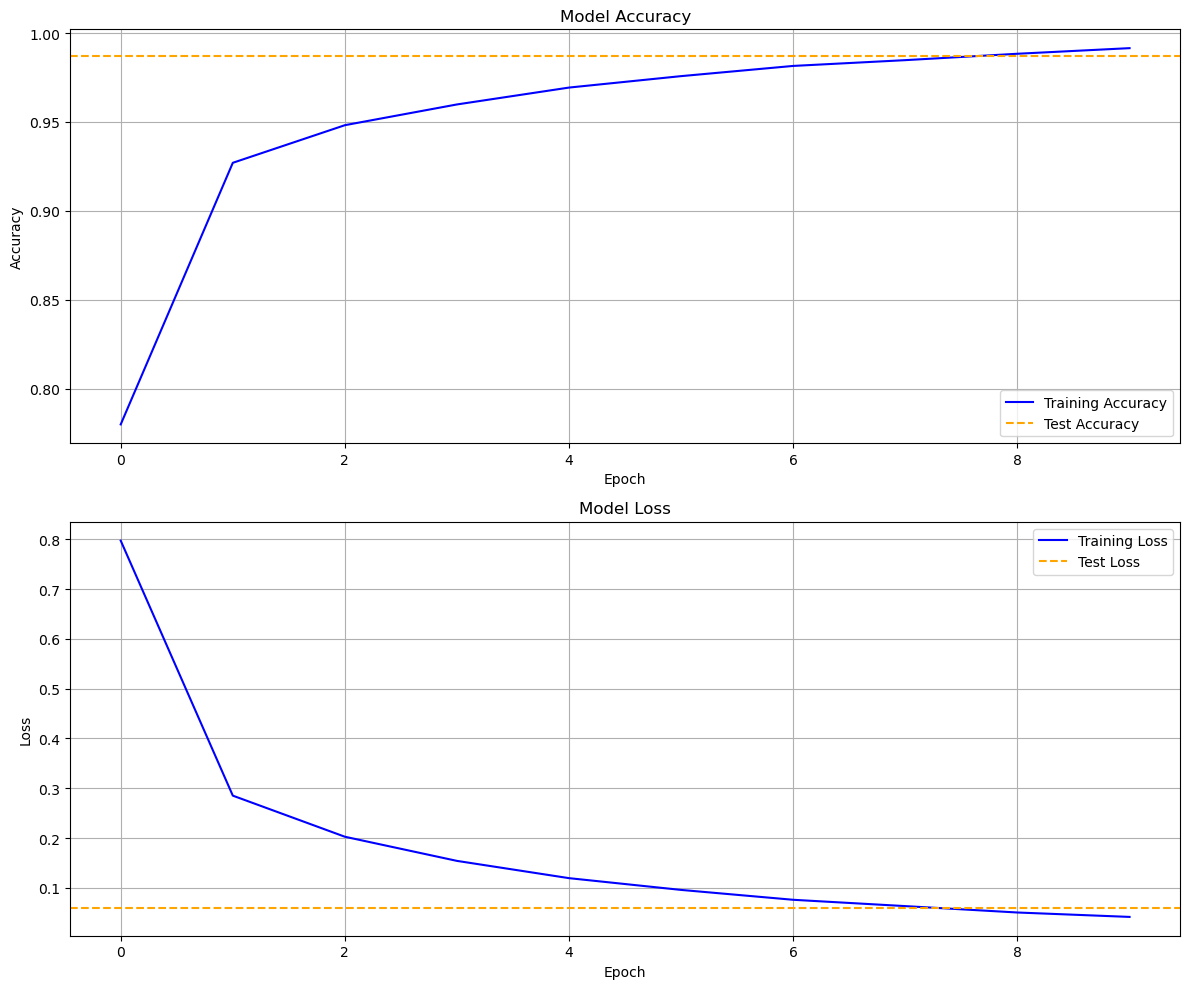

In [14]:
# Plotting training and test accuracy and loss
plt.figure(figsize=(12, 10))

# Accuracy Plot
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], color='blue', label='Training Accuracy')
plt.axhline(y=test_accuracy, color='orange', linestyle='--', label='Test Accuracy')  # Test accuracy line
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss Plot
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], color='blue', label='Training Loss')
plt.axhline(y=test_loss, color='orange', linestyle='--', label='Test Loss')  # Test loss line
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [15]:
import h5py

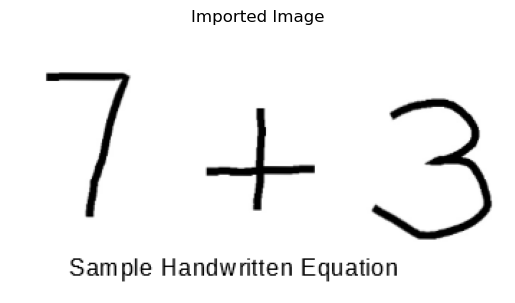

In [108]:
# Define the image path
image_path = r"C:\Users\honey\Documents\Data Science\Course and Internships\LetsGrowMore\Task No.9 Math Equation Solver\image2.png"

# Load the image
image = cv2.imread(image_path)

# Convert BGR to RGB for correct color representation
image_grayscale = cv2.cvtColor(image, cv2.IMREAD_GRAYSCALE)

# Display the image
plt.imshow(image_grayscale)
plt.axis('off')  # Hide the axis
plt.title('Imported Image')
plt.show();

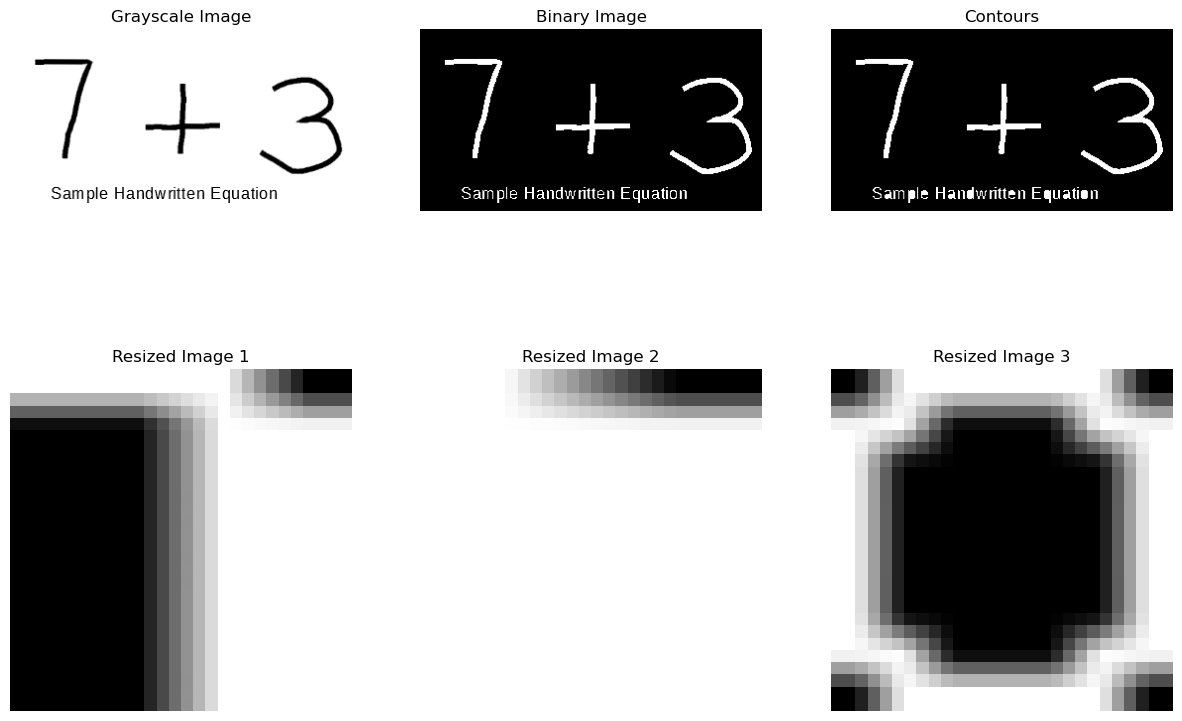

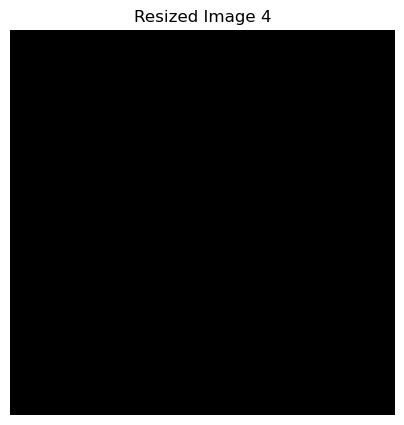

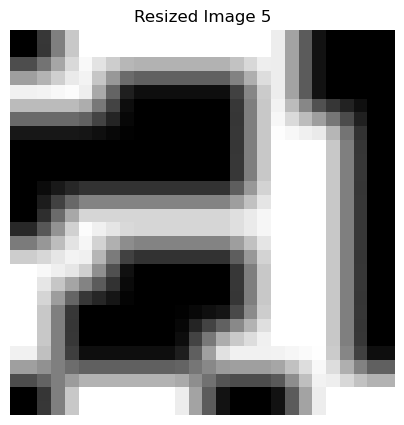

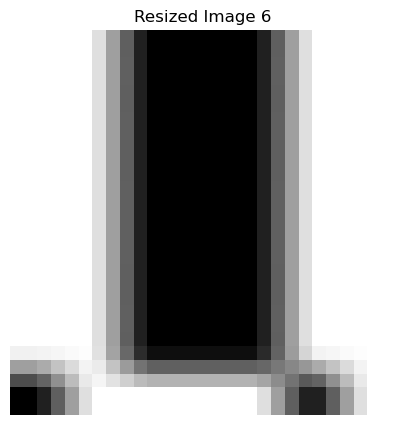

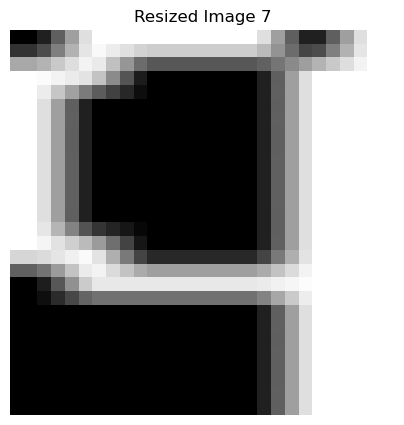

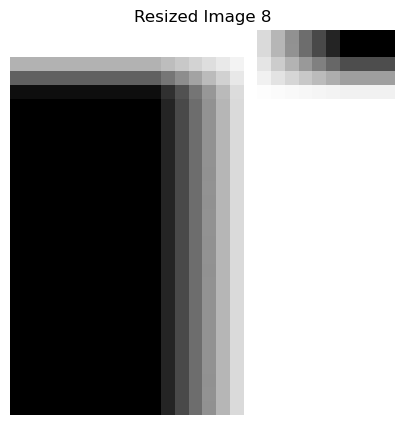

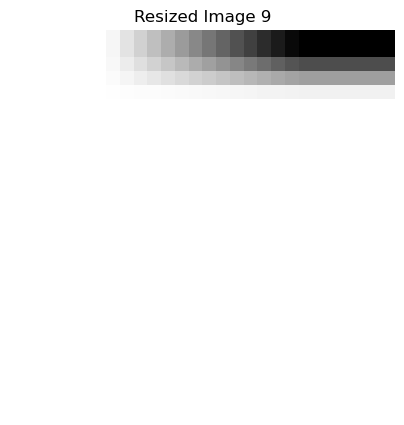

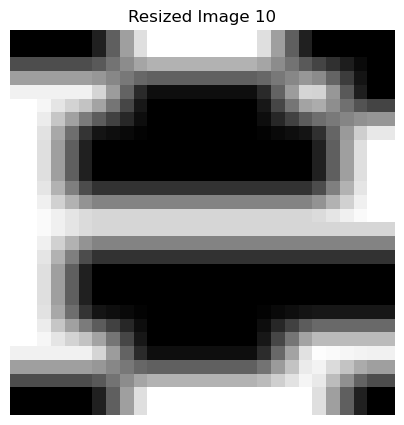

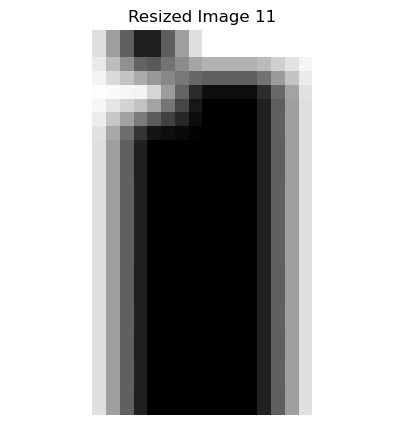

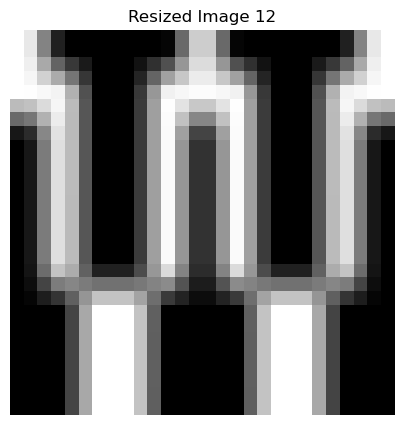

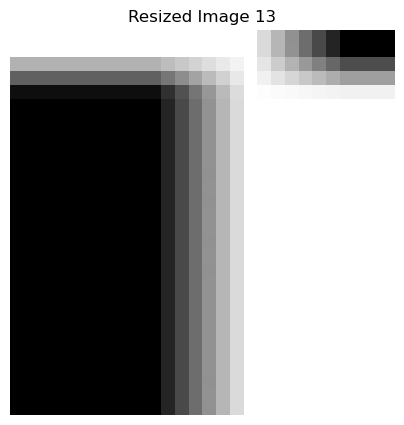

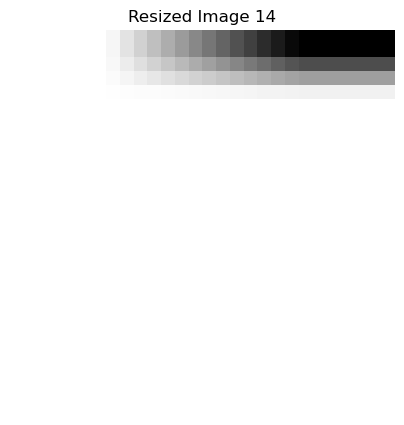

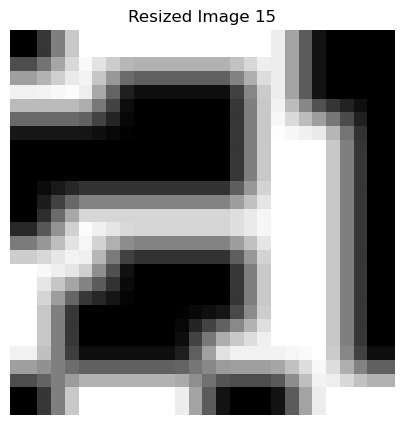

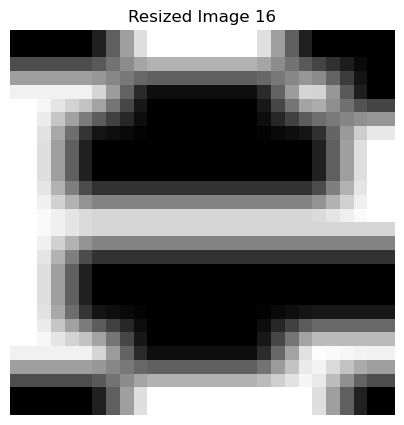

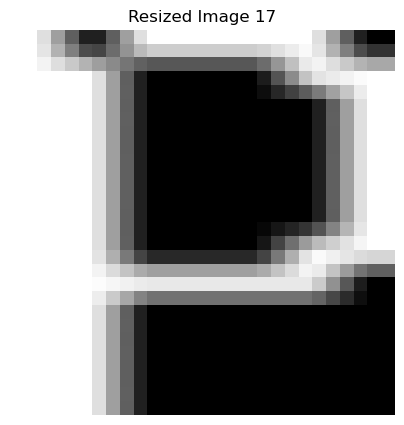

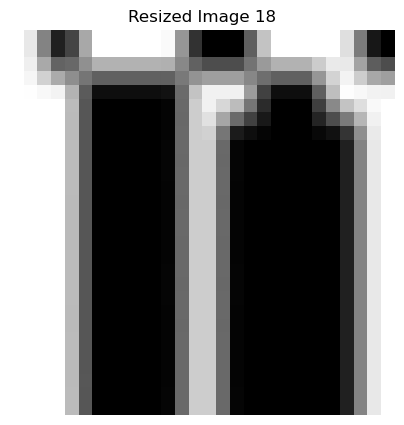

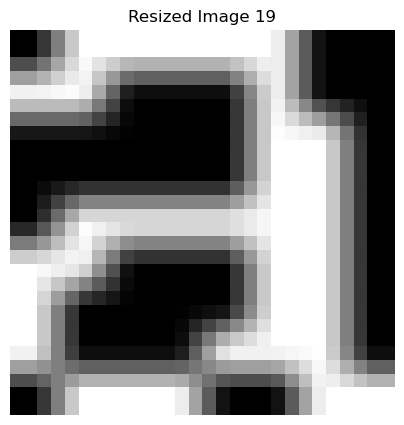

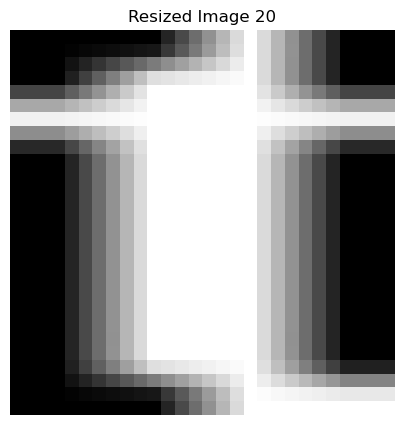

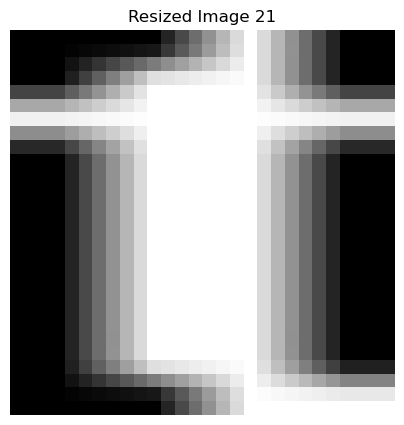

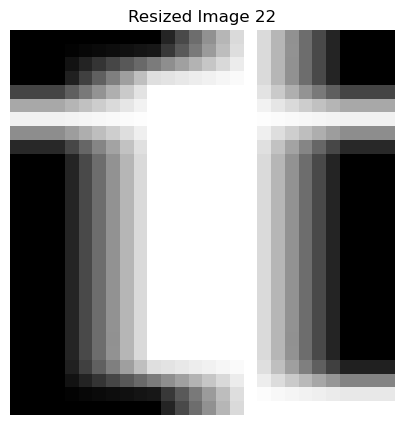

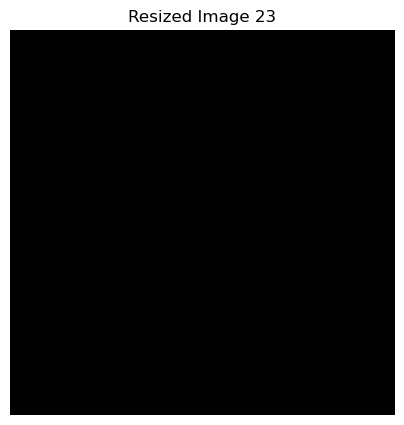

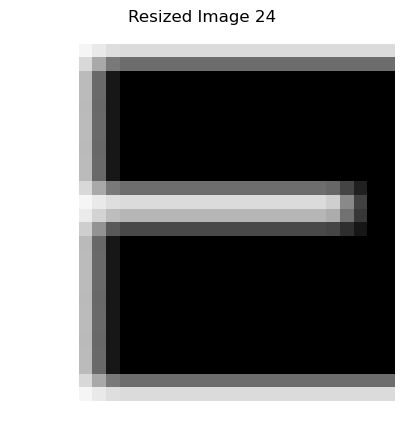

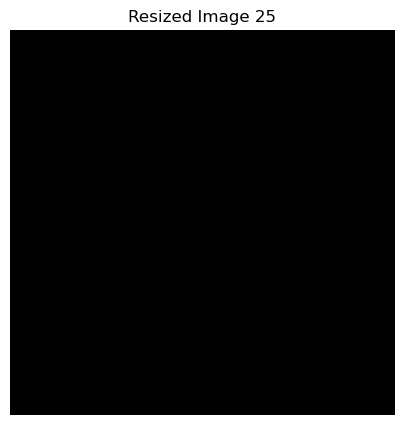

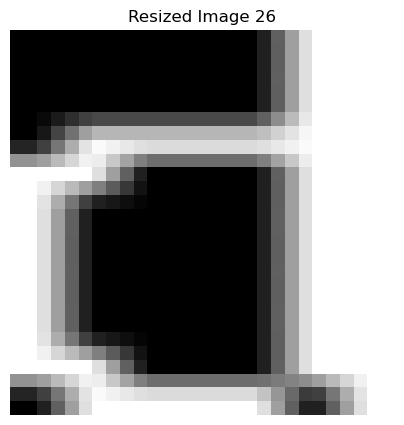

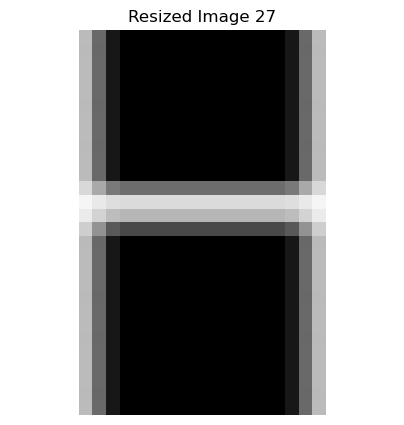

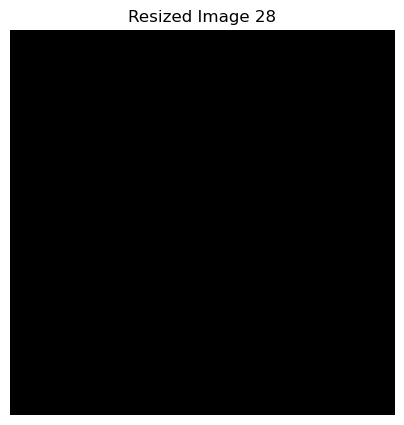

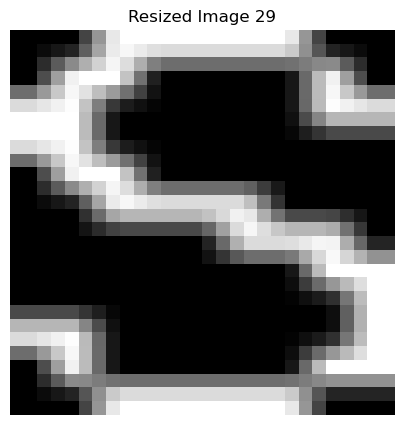

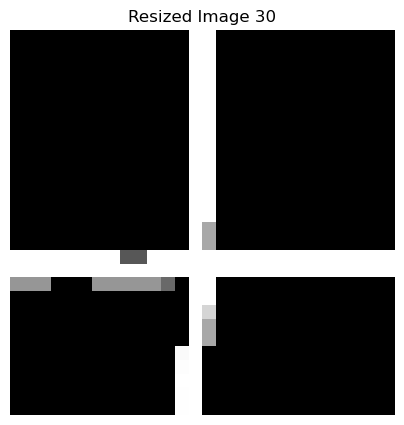

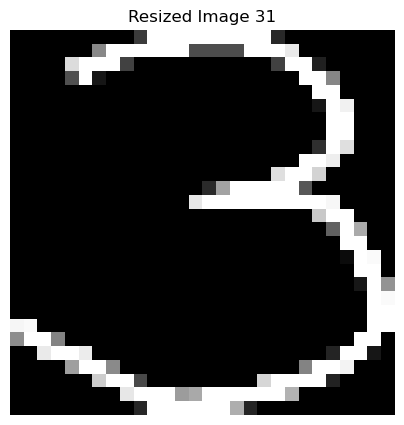

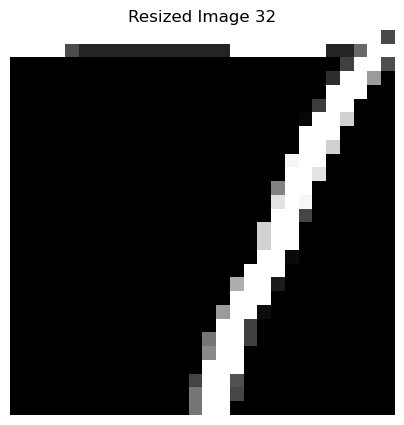

<Figure size 640x480 with 0 Axes>

In [109]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the image path
image_path = r"C:\Users\honey\Documents\Data Science\Course and Internships\LetsGrowMore\Task No.9 Math Equation Solver\image2.png"

# Load the image
image = cv2.imread(image_path)

# Convert to grayscale
image_grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert to binary image
_, binary_image = cv2.threshold(image_grayscale, 128, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a copy of a single-channel image for visualization
contour_image = np.zeros(binary_image.shape, dtype=np.uint8)  # Create a single-channel image for contours
cv2.drawContours(contour_image, contours, -1, (255), thickness=cv2.FILLED)

# Obtain bounding rectangles and filter overlapping rectangles
bounding_rects = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    bounding_rects.append((x, y, w, h))

# Filter out overlapping rectangles
filtered_rects = []
for rect in bounding_rects:
    x, y, w, h = rect
    overlap = False
    for other in filtered_rects:
        if (x < other[0] + other[2] and x + w > other[0] and
            y < other[1] + other[3] and y + h > other[1]):
            overlap = True
            break
    if not overlap:
        filtered_rects.append(rect)

# Resize rectangles to 28x28
resized_images = []
for rect in filtered_rects:
    x, y, w, h = rect
    roi = binary_image[y:y + h, x:x + w]
    resized_roi = cv2.resize(roi, (28, 28))
    resized_images.append(resized_roi)

# Display results
plt.figure(figsize=(15, 10))

# Show original grayscale image
plt.subplot(2, 3, 1)
plt.imshow(image_grayscale, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

# Show binary image
plt.subplot(2, 3, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

# Show contour image
plt.subplot(2, 3, 3)
plt.imshow(contour_image, cmap='gray')
plt.title('Contours')
plt.axis('off')

# Show resized images (if any)
for i, resized in enumerate(resized_images):
    if i < 3:  # Limit to first three in the same figure
        plt.subplot(2, 3, 4 + i)
        plt.imshow(resized, cmap='gray')
        plt.title(f'Resized Image {i + 1}')
        plt.axis('off')
    else:  # Create a new figure for additional images
        plt.figure(figsize=(5, 5))
        plt.imshow(resized, cmap='gray')
        plt.title(f'Resized Image {i + 1}')
        plt.axis('off')
        plt.show()

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show();

In [110]:
import cv2

# Assuming 'resized_roi' is your image to be saved
save_path = r"C:\Users\honey\Documents\Data Science\Course and Internships\LetsGrowMore\Task No.9 Math Equation Solver\resized_image2.png"
cv2.imwrite(save_path, resized_roi)

True

In [120]:
print(resized_roi.shape)
print(type(resized_roi))

(28, 28)
<class 'numpy.ndarray'>


In [121]:
test_image = np.zeros((28, 28), dtype=np.uint8)  # Create a black square
cv2.imwrite(os.path.join(output_dir, "resized_image2.png"), test_image)

True

In [122]:
print("Shape of resized_roi:", resized_roi.shape)
print("Type of resized_roi:", type(resized_roi))
print("Is resized_roi empty?", resized_roi.size == 0)

Shape of resized_roi: (28, 28)
Type of resized_roi: <class 'numpy.ndarray'>
Is resized_roi empty? False


In [114]:
print("Saving to:", save_path)

Saving to: C:\Users\honey\Documents\Data Science\Course and Internships\LetsGrowMore\Task No.9 Math Equation Solver\resized_image2.png


In [91]:
save_path = os.path.join(output_dir, "resized_image.jpg")

In [92]:
test_image = np.zeros((28, 28), dtype=np.uint8)  # Create a black square
test_save_path = os.path.join(output_dir, "test_image.png")
cv2.imwrite(test_save_path, test_image)

True

In [94]:
print("Data type of resized_roi:", resized_roi.dtype)  # Should be uint8

Data type of resized_roi: float32


In [126]:
import cv2
import numpy as np
import os

# Directory containing resized images
input_dir = r"C:\Users\honey\Documents\Data Science\Course and Internships\LetsGrowMore\Task No.9 Math Equation Solver\resized_images2"

# List to hold reshaped images
reshaped_images = []

# Loop through each file in the directory
for filename in os.listdir(input_dir):
    if filename.endswith('.png'):  # Check for PNG images
        # Load the image
        image_path = os.path.join(input_dir, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale

        # Check if the image was loaded successfully
        if image is not None:
            # Verify the shape of the loaded image
            print(f"Original shape of {filename}: {image.shape}")

            # Ensure the image is 28x28
            if image.shape == (28, 28):
                # Normalize the image
                image = image / 255.0  # Scale pixel values to [0, 1]

                # Reshape to (1, 28, 28, 1)
                reshaped_image = image.reshape(1, 28, 28, 1)  # Add batch size and channel dimension
                reshaped_images.append(reshaped_image)
            else:
                print(f"Skipping {filename}: not 28x28, found shape {image.shape}")

# Convert list to numpy array if any images were successfully reshaped
if reshaped_images:
    reshaped_images_array = np.vstack(reshaped_images)  # Stack them into a single numpy array
    print("Shape of reshaped images:", reshaped_images_array.shape)
else:
    print("No images were reshaped successfully.")

Original shape of resized_image2.png: (28, 28)
Original shape of resized_image_1.png: (28, 28)
Original shape of resized_image_10.png: (28, 28)
Original shape of resized_image_11.png: (28, 28)
Original shape of resized_image_12.png: (28, 28)
Original shape of resized_image_13.png: (28, 28)
Original shape of resized_image_14.png: (28, 28)
Original shape of resized_image_15.png: (28, 28)
Original shape of resized_image_16.png: (28, 28)
Original shape of resized_image_17.png: (28, 28)
Original shape of resized_image_18.png: (28, 28)
Original shape of resized_image_19.png: (28, 28)
Original shape of resized_image_2.png: (28, 28)
Original shape of resized_image_20.png: (28, 28)
Original shape of resized_image_21.png: (28, 28)
Original shape of resized_image_22.png: (28, 28)
Original shape of resized_image_23.png: (28, 28)
Original shape of resized_image_24.png: (28, 28)
Original shape of resized_image_25.png: (28, 28)
Original shape of resized_image_26.png: (28, 28)
Original shape of resize

In [136]:
class_to_equation = {
    0: "0",
    1: "1",
    2: "2",
    3: "+",  # Assuming 3 corresponds to "+"
    4: "-",
    5: "*",
    6: "/",
    7: "(",  # For parentheses if needed
    8: ")",  # For parentheses if needed
    9: "10",  # Example for class 9
    10: "11",  # Example for class 10
    11: "12",  # Example for class 11
    12: "13"   # Example for class 12
}

In [137]:
# Prepare to predict for all reshaped images
for i in range(reshaped_images_array.shape[0]):
    # Get the current image input
    image_input = reshaped_images_array[i]

    # Run the model on the image; ensure shape is (1, 1, 28, 28)
    image_input = image_input.reshape(1, 1, 28, 28)  # Add batch and channel dimensions

    # Run the model on the image
    predictions = model.predict(image_input)

    # Post-process the predictions
    predicted_class = np.argmax(predictions, axis=1)
    predicted_equation = class_to_equation.get(predicted_class[0], "Unknown class")

    print(f"Image {i + 1}:")
    print("Predicted Class:", predicted_class)
    print("Predicted Equation:", predicted_equation)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Image 1:
Predicted Class: [12]
Predicted Equation: 13
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Image 2:
Predicted Class: [1]
Predicted Equation: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Image 3:
Predicted Class: [8]
Predicted Equation: )
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Image 4:
Predicted Class: [1]
Predicted Equation: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Image 5:
Predicted Class: [1]
Predicted Equation: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Image 6:
Predicted Class: [1]
Predicted Equation: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image 7:
Predicted Class: [1]
Predicted Equation: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Image 8:
Predicted Class: [8]
Predicted Equation: )
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Image 9:
Predicted Class: [8]
Predicted Equation: )
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Image 10:
Predicted Class: [1]
Predicted Equation: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Image 11:
Predicted Class: [8]
Predicted Equation: )
1/1 ━━

In [138]:
# Convert predicted class to the corresponding equation
predicted_equation = class_to_equation.get(predicted_class[0], "Unknown class")

print("Predicted Class:", predicted_class)
print("Predicted Equation:", predicted_equation)

Predicted Class: [1]
Predicted Equation: 1


In [143]:
class_to_equation = {
    0: "0", 1: "1", 2: "2", 3: "3", 4: "4", 5: "5",
    6: "6", 7: "7", 8: "8", 9: "9", 10: "+", 11: "-",
    12: "(", 13: ")"  # Update with your actual mapping
}

# Initialize an empty list to hold symbols
predicted_equations = []

# Iterate through each resized image
for i in range(reshaped_images_array.shape[0]):
    image_input = reshaped_images_array[i].reshape(1, 1, 28, 28)  # Shape it for the model
    predictions = model.predict(image_input)  # Get predictions
    predicted_class = np.argmax(predictions, axis=1)  # Get the class with the highest probability

    # Convert predicted class to corresponding symbol
    predicted_symbol = class_to_equation.get(predicted_class[0], "Unknown")
    predicted_equations.append(predicted_symbol)  # Store the symbol

# Construct the equation string
equation_string = " ".join(predicted_equations)

# Output the results
print(f"Predicted Equation String: '{equation_string}'")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━

In [147]:
import re

# Example of predicted_equation
predicted_equation = '( 1 8 1 1 1 1 8 8 1 8 8 1 1 1 1 1 1 1 1 4 1 8 8 4 3 7 1 8 8 1 1 1'

# Replace multiple spaces with a single space
predicted_equation = re.sub(r'\s+', ' ', predicted_equation)

# Remove extra opening parentheses
predicted_equation = re.sub(r'\(\s*\(', '(', predicted_equation)

# Remove extra closing parentheses
predicted_equation = re.sub(r'\)\s*\)', ')', predicted_equation)

# Optional: Check for unmatched parentheses
open_parens = predicted_equation.count('(')
close_parens = predicted_equation.count(')')
if open_parens != close_parens:
    print("Error: Unmatched parentheses.")
else:
    # Evaluate the cleaned equation
    try:
        result = eval(predicted_equation)
        print("Predicted Equation:", predicted_equation)
        print("Result:", result)
    except SyntaxError as e:
        print("Error evaluating equation:", e)
    except Exception as e:
        print("General error evaluating equation:", e)

Error: Unmatched parentheses.


In [148]:
print("Predicted Equation String:", predicted_equation)

Predicted Equation String: ( 1 8 1 1 1 1 8 8 1 8 8 1 1 1 1 1 1 1 1 4 1 8 8 4 3 7 1 8 8 1 1 1


In [151]:
predicted_equation = re.sub(r'\s+', ' ', predicted_equation).strip()

In [160]:
# Example list of predicted class indices (update this with your actual predictions)
predicted_classes = [7, 10, 3]  # Replace with your actual predicted classes

# Mapping of classes to symbols
class_to_symbol = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
    10: "+",  # Assume this is the class for '+'
    11: "-",   # Assume this is the class for '-'
    12: "=",   # Assume this is the class for '='
    # Add more mappings as necessary
}

# Create an equation string
equation_string = ""
for predicted_class in predicted_classes:
    equation_string += class_to_symbol.get(predicted_class, "") + " "

# Strip the trailing space and print the result
equation_string = equation_string.strip()
print("Predicted Equation:", equation_string)

# If you want to evaluate the equation
if " + " in equation_string:
    parts = equation_string.split(" + ")
    if len(parts) == 2:
        result = int(parts[0]) + int(parts[1])
        equation_string += f" = {result}"
        print("Evaluated Equation:", equation_string)

Predicted Equation: 7 + 3
Evaluated Equation: 7 + 3 = 10
